### Ridge Regression

In [533]:
from sklearn.datasets import fetch_california_housing
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
california = fetch_california_housing()
X = california.data
y = california.target

In [534]:
dataset_len = len(X)
trainX = X[0:20000]
trainY = y[0:20000]
testX = X[20000:dataset_len]
testY = y[20000:dataset_len]

In [535]:
mean = np.mean(trainX, axis =0)
std = np.std(trainX, axis =0)

In [536]:
norm_trainX = (trainX-mean)/std

In [537]:
X = np.zeros((trainX.shape[0], trainX.shape[1]+1))
X[:,0] = 1 # setting bias to be 1
X[:,1:] = norm_trainX   # X is our normalized trainX

In [538]:
y = trainY  # y is our trainY
Xt = X.transpose()

In [539]:
XtX = Xt@X
XtX_inv = inv(XtX)
theta = XtX_inv@Xt@y

In [540]:
theta

array([ 2.07238407,  0.83573938,  0.12007427, -0.2749858 ,  0.31406472,
       -0.00495239, -0.03962705, -0.90726908, -0.88345989])

In [541]:
train_pred_Y = norm_trainX@theta[1:] + theta[0]

In [542]:
norm_testX = (testX-mean)/std

In [543]:
test_pred_Y = norm_testX@theta[1:] + theta[0]

([<matplotlib.lines.Line2D at 0x7f7491cf8a00>],
 [<matplotlib.lines.Line2D at 0x7f7491cf8d00>])

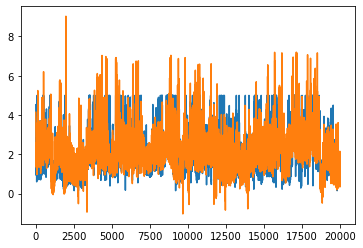

In [544]:
plt.plot(trainY),plt.plot(train_pred_Y)

([<matplotlib.lines.Line2D at 0x7f7491a346d0>],
 [<matplotlib.lines.Line2D at 0x7f7491a349d0>])

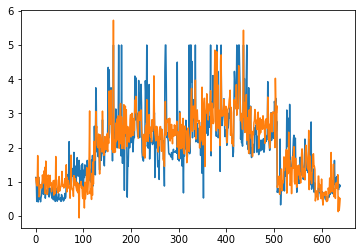

In [547]:
plt.plot(testY),plt.plot(test_pred_Y)

In [548]:
total_train_error = np.sum(np.power(trainY-train_pred_Y, 2))/len(testY)
total_train_error

16.512609949787976

In [549]:
total_test_error = np.sum(np.power(testY-test_pred_Y, 2))/len(testY)
total_test_error

0.3977047399699554

### Q6 part b

In [573]:
lambda_ridge = 1
ridge = lambda_ridge * np.eye(XtX.shape[0])
ridge[0,0] = 0

In [574]:
XtX_inv = inv(XtX+ridge)
theta = XtX_inv@Xt@y

In [575]:
theta

array([ 2.07238407,  0.83571071,  0.12014452, -0.27484995,  0.31388431,
       -0.00492907, -0.03963095, -0.9066045 , -0.88278866])

In [576]:
train_pred_Y = norm_trainX@theta[1:] + theta[0]
test_pred_Y = norm_testX@theta[1:] + theta[0]

([<matplotlib.lines.Line2D at 0x7f7491213070>],
 [<matplotlib.lines.Line2D at 0x7f7491213370>])

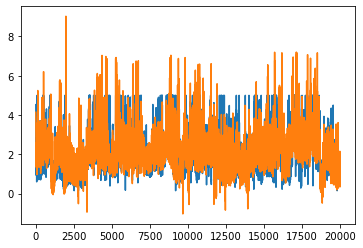

In [577]:
plt.plot(trainY),plt.plot(train_pred_Y)

([<matplotlib.lines.Line2D at 0x7f7490f94130>],
 [<matplotlib.lines.Line2D at 0x7f7490f94430>])

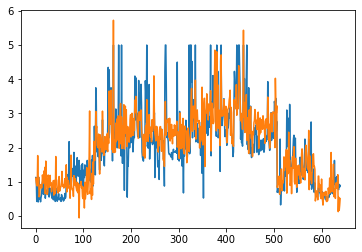

In [578]:
plt.plot(testY),plt.plot(test_pred_Y)

In [579]:
total_train_error = np.sum(np.power(trainY-train_pred_Y, 2))/len(testY)
total_train_error

16.512611988083126

In [580]:
total_test_error = np.sum(np.power(testY-test_pred_Y, 2))/len(testY)
total_test_error

0.3976530986755324

### Q6 part c

In [581]:
from sklearn import linear_model
california = fetch_california_housing()
X = california.data
y = california.target
dataset_len = len(X)
trainX = X[0:20000]
trainY = y[0:20000]
testX = X[20000:dataset_len]
testY = y[20000:dataset_len]
norm_trainX = (trainX-mean)/std
norm_testX = (testX-mean)/std

In [622]:
reg = linear_model.Lasso(alpha = 0.02)
reg.fit(norm_trainX,trainY)
train_pred_Y = reg.predict(norm_trainX)
test_pred_Y = reg.predict(norm_testX)
reg.coef_

array([ 7.30063582e-01,  1.31638971e-01, -6.51720480e-04,  3.82782628e-02,
       -0.00000000e+00, -1.96094808e-02, -6.94350317e-01, -6.55903466e-01])

In [623]:
total_test_error = np.sum(np.power(trainY-train_pred_Y, 2))/len(testY)
total_test_error

17.20316118513542

In [624]:
total_test_error = np.sum(np.power(testY-test_pred_Y, 2))/len(testY)
total_test_error

0.38507886304678773